# Git Tutorial Part II: Collaborative Development

What we are about to discuss uses the **Shared Repository Model**, which is the most commonly used model.

## Forking 

Point your browser to:
https://github.com/variscarey/shared_test_repo

In the upper right hand corner of the page there is button to **Fork** the repo-this give you a copy of the repo on *your* github account.

## Making a Pull Request

We're going to add a "feature" to hello_world.py(your name or clever saying) in our *shared code base* by these steps:

1. Fork the repo
2. Make a local clone from Github.
3. Add your feature(new branch-good code practice)
4. Push your feature to your repository on Github
5. Make a **PULL REQUEST** on Github.

We've covered how to do steps 1-4 already in Tutorial I.  I've left a blank code box below where we can work through the steps together.

Pull requests let you notify other developers about changes you've pushed to a repository on GitHub. Once a pull request is opened, you can 
* Discuss and review the potential changes with collaborators 
* add additional commits before the changes are merged into the repository.

To actually make a pull request, click on **NEW PULL REQUEST** on the repository (shared_test_repo) page.

*From Github PR Tutorial*
Once you've created a pull request, you can push commits from your topic branch to add them to your existing pull request. These commits will appear in chronological order within your pull request and the changes will be visible in the "Files changed" tab.

Other contributors can:
* review your proposed changes 
* add review comments 
* contribute to the pull request discussion 
* add commits to the pull request.

After you're happy with the proposed changes, you can merge the pull request. If you're working in a shared repository model, the proposed changes will be merged from the head branch to the base branch that was specified in the pull request.

On Github, you can give multiple people push access, the ability to merge pull requests or push directly to this repo.  This allows you to avoid the PR process.

I'll demo doing the merge on Github for some of your pull requests now.


## NEVER USE THE FORCE

/Users/Undertrick/CCM/git_tutorial


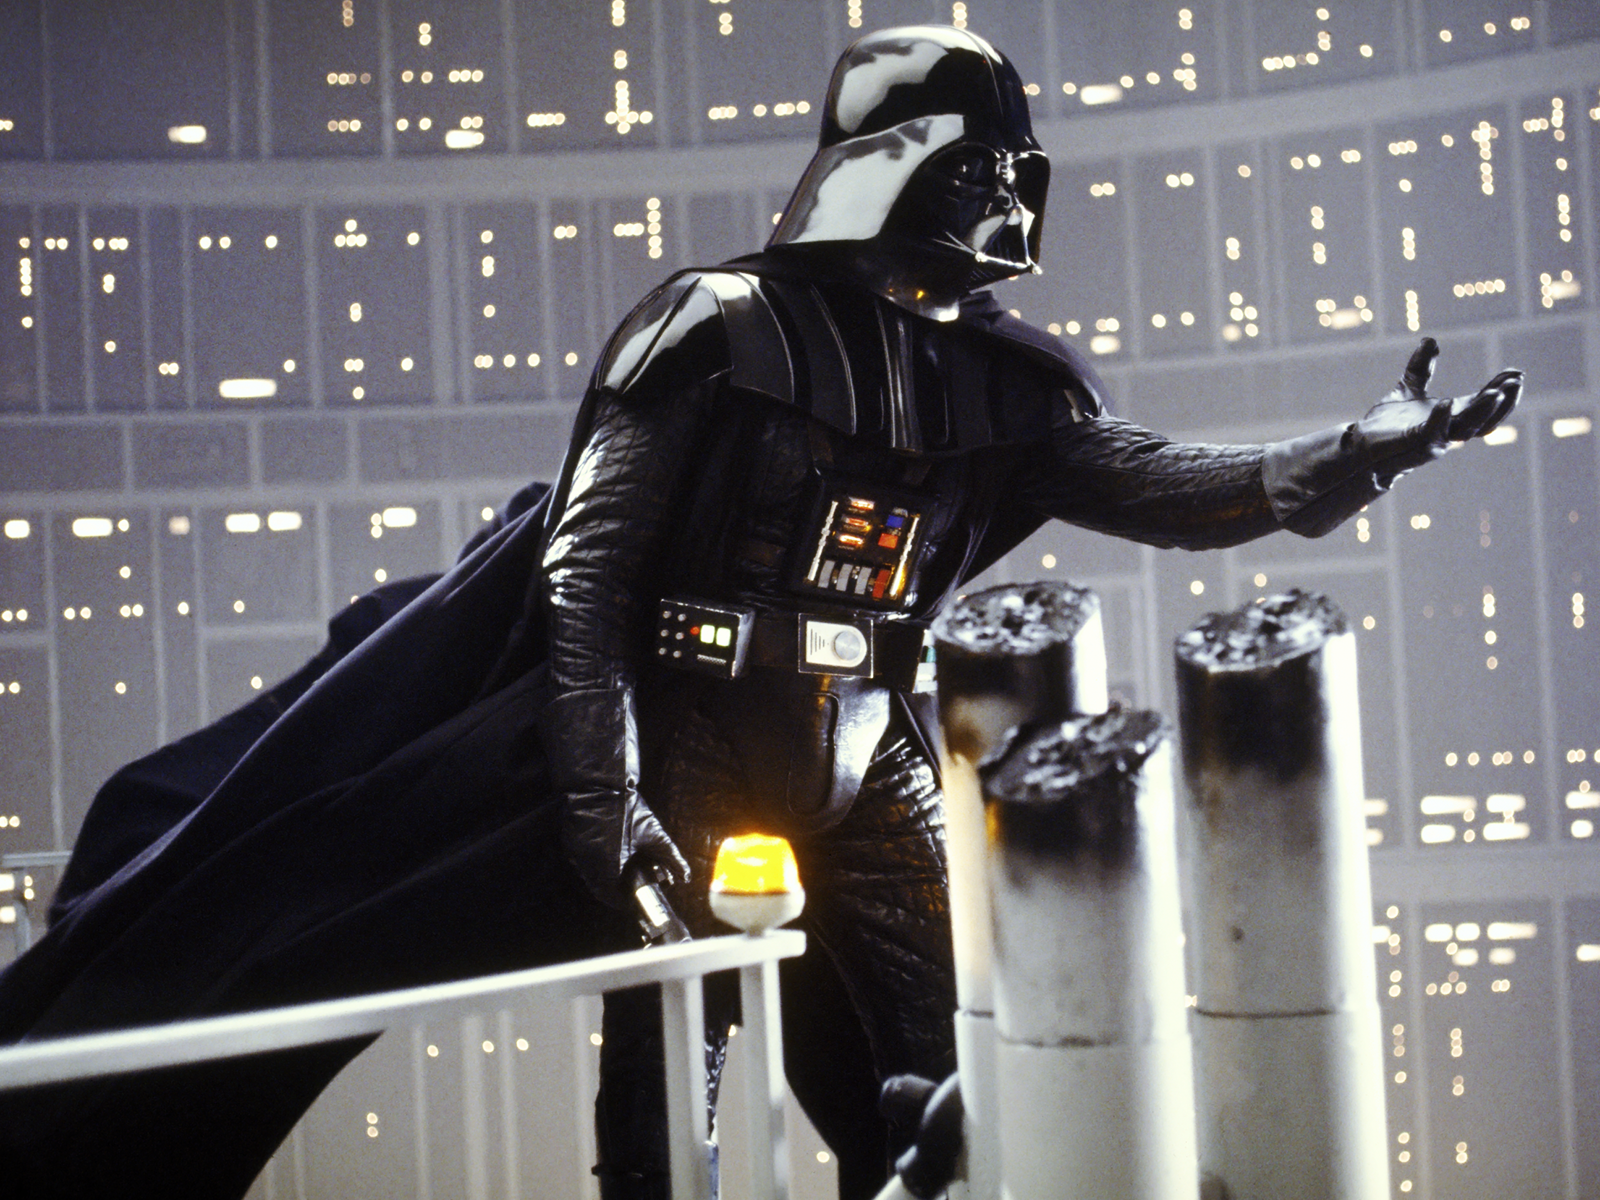

In [33]:
%cd ~/CCM/git_tutorial
from IPython.display import Image
Image(filename='./Vaders_revelation.png',width=500)

"Use force push only as a last resort when everything else fails. Things might get ugly for you and for your repository."

## Pulling in from another repository 

Just like there is git push, there is git pull.  Say you forked a public repo to add a feature, but there are several later bugfixes that you need to pull in from downstream.

The process is simple.  Make sure you've committed your work (or use *git stash* to remember where you where before you pulled in the new work), and do

    git pull <remote repo ref> <remote branch to pull in>

The defaults are identical to before, origin for the repo ref and master for the branch.
    
I'm going to add a new branch to *my* shared repo(this is after you have forked it). 

The sequence of my steps is

    %%bash
    cd ~/shared-repo
    git checkout -b add_date #create a branch + check it out
    #open editor and add command to add the date
    git add hello_world.py
    git commit -m "added date to hello_world"
    git push origin add_date


In [ ]:
%%bash
git remote add vc_repo https://github.com/variscarey/shared_test_repo
git pull vc_repo add_date
#this will pull the add_date branch into whatever local branch 
#you are working on


## Options to *git pull*

*git pull* is a combination of *git fetch* and *git merge*.  If you want to update your index/history, you can to a git fetch, which will not make any local changes, just update your index to reflect changes in the remote.   You will then have to *git merge* the changes after reviewing them.


## Unit Testing

Typically, a good code base should involve unit testing, tests of code portions that produce expected output.  When the code is changed, the unit tests are run, and if the output fails, it fails the test.  Typically one doesn't *merge* pull requests if it fais existing units tests.

Here's the code from quad_form.py in our shared repo

    def quad_form(a,b,c):

        from math import sqrt
        ''' expects inputs a,b,c, coefficients of ax^2+bx+c, returns tuple of roots. '''
        discrim=b**2-4*a*c
        root1=(-b+sqrt(discrim))/(2*a)
        root2=(-b-sqrt(discrim))/(2*a)
        return root1,root2

I've pasted the corresponding unit test below.  It evaluates the formula for $x^2+x-1$ and compares against the known roots. 

A better practice would use a value of $\sqrt{5}$ that actually doesn't come from a system library (here python math) but is precomputed elsewhere and transcribed.

In [34]:
%cd ~/shared_repo
import math
import quad_form as qf

tol=1E-15
a=1.0
b=1.0
c=-1.0
roots=qf.quad_form(a,b,c)
sqr5=math.sqrt(5)
r1=.5*(-1.0+sqr5)
r2=.5*(-1.0-sqr5)
err1=math.fabs(roots[0]-r1)
err2=math.fabs(roots[1]-r2)
if err1 < tol and err2 < tol:
    print('Pass Unit Test 1')
else:
    print('Fail Unit Test 1'),err1,err2

/Users/Undertrick/shared_repo
Pass Unit Test 1


Let's spend of the rest of the time adding features to quad_form.py and updating the unit_test file to test your new feature to see if it works properly.

A few suggested features:
1. Error handling in the case of imaginary roots
2. Allowing complex coefficients in the quadratic
3. Corner cases: linear functions, zero functions
4. Harder: numerically stable implementation of quadratic formula.

If $|b| \approx \sqrt{b^2-4ac}$, the quadratic formula can have large cancellation for one of the roots due to subtraction of floating point numbers.
Modify the algorithm to cater to this scenario.  The solution is to compute one root without subtraction and then use that fact that the **product** of the roots is equal to $c/a$ to compute the second root.

In all cases: 
* add your feature to your github repository
* update a unit test
* make a pull request for my github repository, which is (repeated) https://github.com/variscarey/shared_test_repo